In [1]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

2025-10-02 18:32:05.496604: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-02 18:32:06.125143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exa

In [2]:
DATA_PATH = "./data_reclassified"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [3]:
download_dataset(DATA_PATH)

✅ Dataset já existe em: ./data
Pulando download...


In [3]:
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH)
X_test, y_test, _ = load_dataset(TEST_PATH)

X_train.shape, y_train.shape, LABEL_MAP

((28709, 48, 48, 3),
 (28709,),
 {'angry': 0,
  'disgust': 1,
  'fear': 2,
  'happy': 3,
  'neutral': 4,
  'sad': 5,
  'surprise': 6})

In [4]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
}

2025-10-02 18:32:34.823292: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...
Epoch 1/60


2025-10-02 18:32:52.248418: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1988 - loss: 3.2117

2025-10-02 18:33:43.199903: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.2299 - loss: 2.7629 - val_accuracy: 0.3236 - val_loss: 1.8730 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.2979 - loss: 2.1364 - val_accuracy: 0.3676 - val_loss: 1.7261 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3288 - loss: 1.9120 - val_accuracy: 0.3988 - val_loss: 1.6515 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3622 - loss: 1.7776 - val_accuracy: 0.3993 - val_loss: 1.6071 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3809 - loss: 1.6916 - val_accuracy: 0.4129 - val_loss: 1.5829 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.3995 - loss: 1.6225 - val_accuracy: 0.4155 - val_loss: 1.5657 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accurac

2025-10-02 19:06:21.106099: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2212 - loss: 1.9315

2025-10-02 19:07:49.406065: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 158754816 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 113s 131ms/step - accuracy: 0.2618 - loss: 1.8413 - val_accuracy: 0.3485 - val_loss: 1.6657 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.3393 - loss: 1.6856 - val_accuracy: 0.3816 - val_loss: 1.6016 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.3695 - loss: 1.6245 - val_accuracy: 0.3959 - val_loss: 1.5716 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.3835 - loss: 1.5908 - val_accuracy: 0.4136 - val_loss: 1.5452 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step - accuracy: 0.3980 - loss: 1.5706 - val_accuracy: 0.4166 - val_loss: 1.5330 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.4032 - loss: 1.5506 - val_accuracy: 0.4289 - val_loss: 1.5181 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 87s 121ms/step -

2025-10-02 20:32:22.251293: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 634991616 exceeds 10% of free system memory.


718/718 ━━━━━━━━━━━━━━━━━━━━ 149s 205ms/step - accuracy: 0.2214 - loss: 1.9350 - val_accuracy: 0.3196 - val_loss: 1.7476 - learning_rate: 1.0000e-04
Epoch 2/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.2789 - loss: 1.7920 - val_accuracy: 0.3443 - val_loss: 1.6905 - learning_rate: 1.0000e-04
Epoch 3/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.3096 - loss: 1.7330 - val_accuracy: 0.3619 - val_loss: 1.6597 - learning_rate: 1.0000e-04
Epoch 4/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.3231 - loss: 1.7006 - val_accuracy: 0.3675 - val_loss: 1.6378 - learning_rate: 1.0000e-04
Epoch 5/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.3374 - loss: 1.6725 - val_accuracy: 0.3744 - val_loss: 1.6229 - learning_rate: 1.0000e-04
Epoch 6/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 145s 202ms/step - accuracy: 0.3486 - loss: 1.6530 - val_accuracy: 0.3776 - val_loss: 1.6130 - learning_rate: 1.0000e-04
Epoch 7/60
718/718 ━━━━━━━━━━━━━━━━━━━━ 147s 204ms/

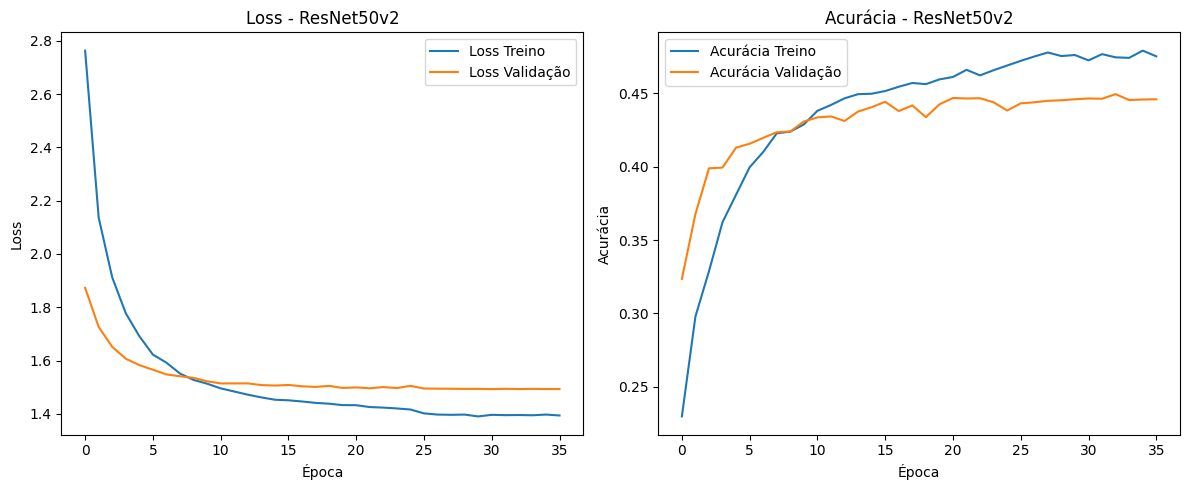

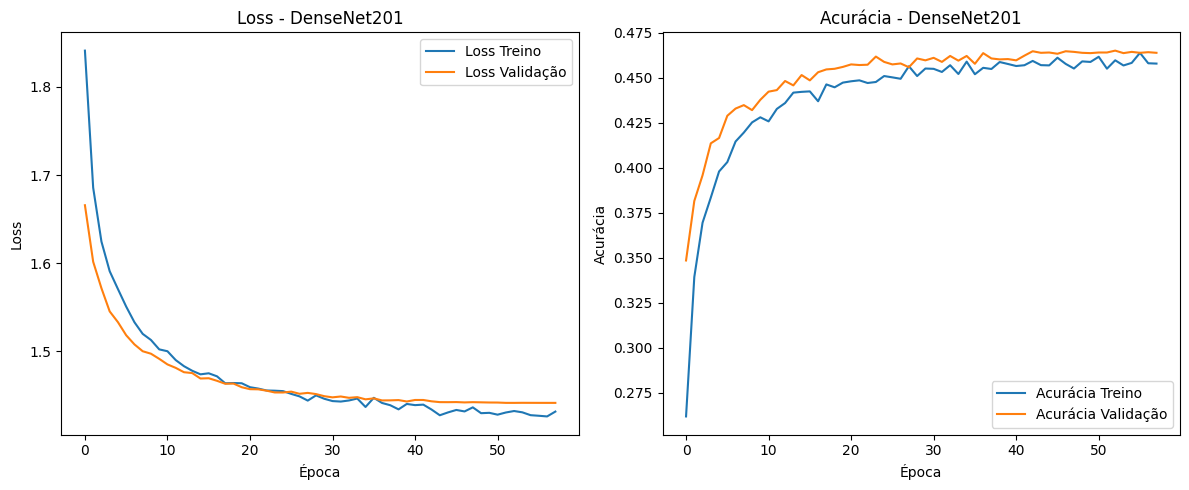

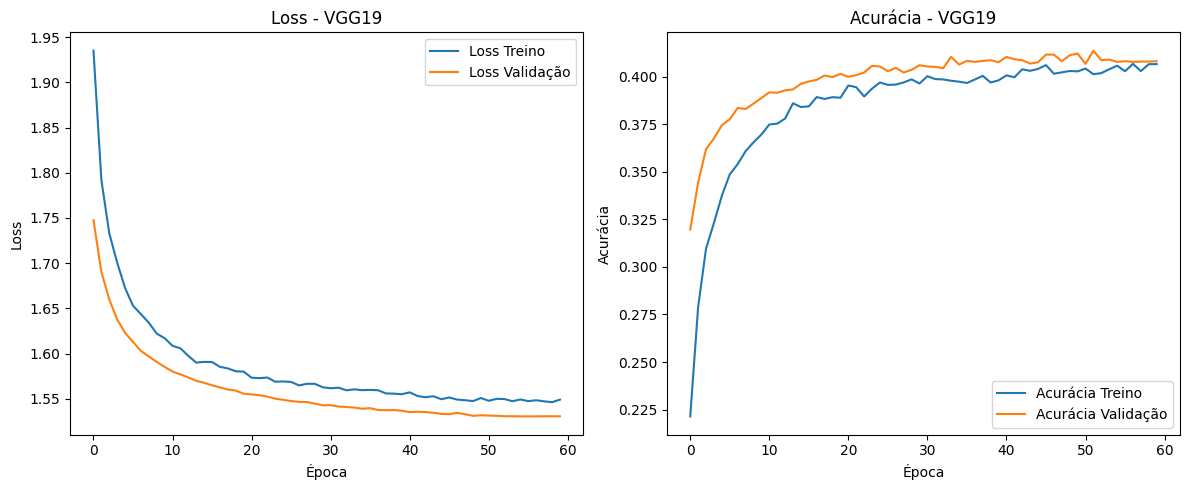

In [6]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [7]:
y_preds = {}
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

898/898 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 92s 96ms/step
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.5004
Precision Score:  0.5489
Recall Score:     0.4302
F1 Score:         0.4344

Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.31      0.37      4056
           1       0.85      0.07      0.12       789
           2       0.46      0.30      0.36      3519
           3       0.52      0.70      0.60      6301
           4       0.60      0.58      0.59      3292
           5       0.49      0.52      0.51      5567
           6       0.45      0.54      0.49      5185

    accuracy                           0.50     28709
   macro avg       0.55      0.43      0.43     28709
weighted avg       0.51      0.50      0.49     28709


Acurácia por classe:
- angry: 30.89%
- disgust: 6.59%
- fear: 29.55%
- happy: 69.85%
- neutral: 57.87%
- sad: 51.97%
- surprise: 54.45%


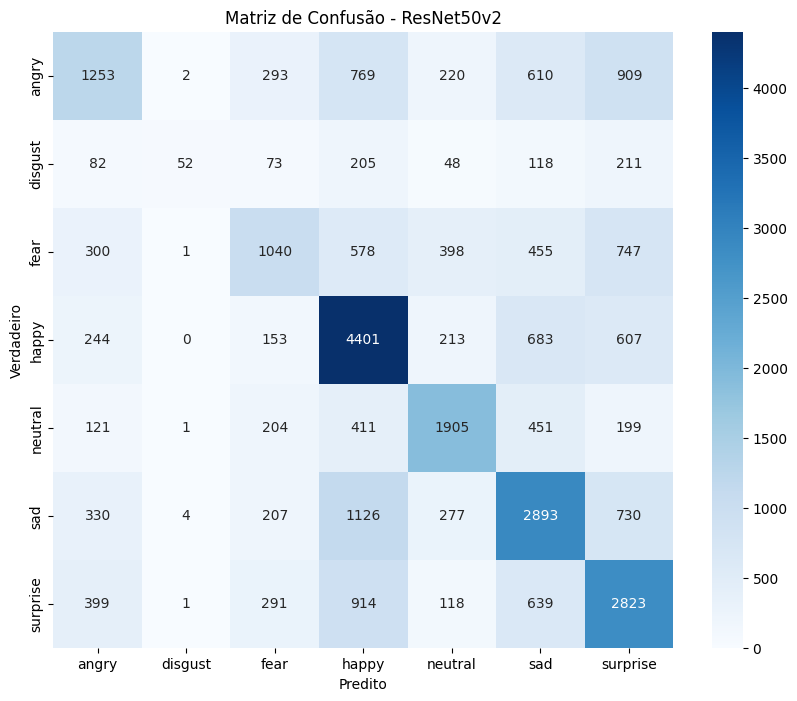

Métricas do modelo: DenseNet201
Accuracy Score:   0.4857
Precision Score:  0.5178
Recall Score:     0.4135
F1 Score:         0.4145

Classification Report:

              precision    recall  f1-score   support

           0       0.44      0.31      0.37      4056
           1       0.73      0.04      0.07       789
           2       0.43      0.27      0.33      3519
           3       0.52      0.68      0.59      6301
           4       0.59      0.56      0.57      3292
           5       0.48      0.53      0.50      5567
           6       0.44      0.51      0.47      5185

    accuracy                           0.49     28709
   macro avg       0.52      0.41      0.41     28709
weighted avg       0.49      0.49      0.47     28709


Acurácia por classe:
- angry: 31.31%
- disgust: 3.80%
- fear: 26.60%
- happy: 67.78%
- neutral: 55.89%
- sad: 53.46%
- surprise: 50.57%


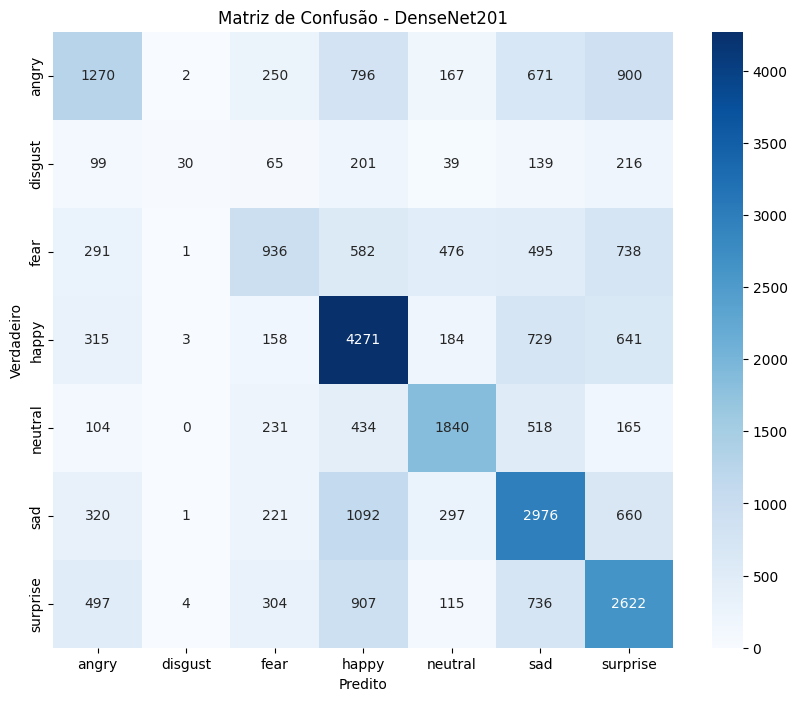

Métricas do modelo: VGG19
Accuracy Score:   0.4254
Precision Score:  0.3634
Recall Score:     0.3558
F1 Score:         0.3488

Classification Report:

              precision    recall  f1-score   support

           0       0.37      0.21      0.27      4056
           1       0.00      0.00      0.00       789
           2       0.40      0.19      0.26      3519
           3       0.44      0.60      0.51      6301
           4       0.53      0.52      0.53      3292
           5       0.41      0.47      0.44      5567
           6       0.39      0.49      0.44      5185

    accuracy                           0.43     28709
   macro avg       0.36      0.36      0.35     28709
weighted avg       0.41      0.43      0.41     28709


Acurácia por classe:
- angry: 21.30%
- disgust: 0.00%
- fear: 19.27%
- happy: 60.12%
- neutral: 52.34%
- sad: 47.05%
- surprise: 49.01%


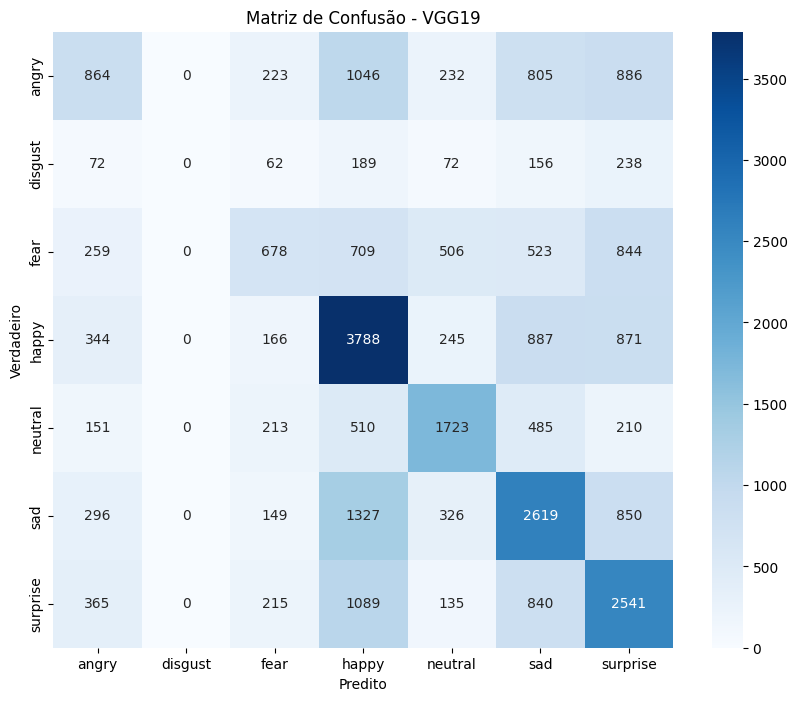

In [8]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_completa", LABEL_MAP)

In [9]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 157ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4188
Precision Score:  0.4297
Recall Score:     0.3527
F1 Score:         0.3531

Classification Report:



              precision    recall  f1-score   support

           0       0.30      0.23      0.26       958
           1       0.60      0.05      0.10       111
           2       0.33      0.17      0.23      1024
           3       0.54      0.61      0.57      1774
           4       0.53      0.53      0.53       831
           5       0.36      0.43      0.39      1233
           6       0.35      0.44      0.39      1247

    accuracy                           0.42      7178
   macro avg       0.43      0.35      0.35      7178
weighted avg       0.41      0.42      0.41      7178


Acurácia por classe:
- angry: 22.96%
- disgust: 5.41%
- fear: 17.48%
- happy: 60.65%
- neutral: 52.71%
- sad: 43.39%
- surprise: 44.27%


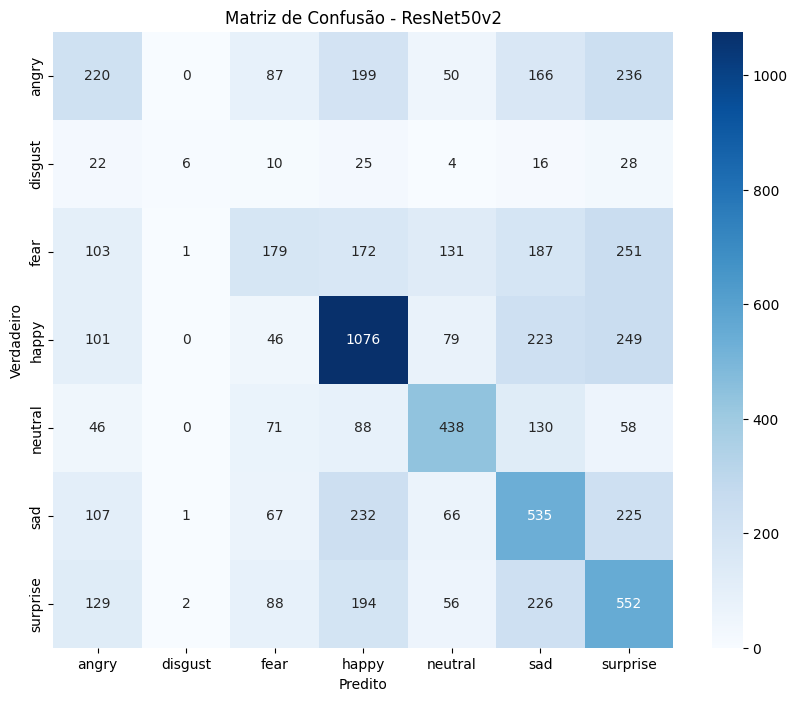

Métricas do modelo: DenseNet201
Accuracy Score:   0.4093
Precision Score:  0.4149
Recall Score:     0.3455
F1 Score:         0.3467

Classification Report:

              precision    recall  f1-score   support

           0       0.28      0.23      0.26       958
           1       0.55      0.05      0.10       111
           2       0.29      0.16      0.21      1024
           3       0.52      0.59      0.55      1774
           4       0.56      0.52      0.54       831
           5       0.34      0.44      0.39      1233
           6       0.36      0.42      0.38      1247

    accuracy                           0.41      7178
   macro avg       0.41      0.35      0.35      7178
weighted avg       0.40      0.41      0.40      7178


Acurácia por classe:
- angry: 23.38%
- disgust: 5.41%
- fear: 16.02%
- happy: 58.91%
- neutral: 52.35%
- sad: 43.96%
- surprise: 41.86%


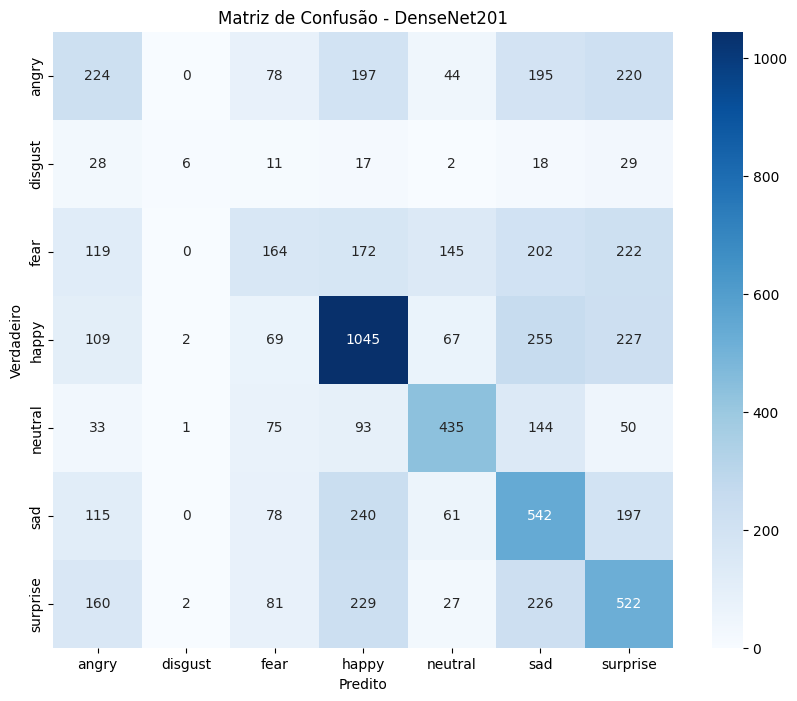

Métricas do modelo: VGG19
Accuracy Score:   0.3781
Precision Score:  0.3158
Recall Score:     0.312
F1 Score:         0.3046

Classification Report:

              precision    recall  f1-score   support

           0       0.30      0.18      0.22       958
           1       0.00      0.00      0.00       111
           2       0.31      0.13      0.19      1024
           3       0.45      0.54      0.49      1774
           4       0.52      0.50      0.51       831
           5       0.31      0.42      0.36      1233
           6       0.33      0.41      0.37      1247

    accuracy                           0.38      7178
   macro avg       0.32      0.31      0.30      7178
weighted avg       0.36      0.38      0.36      7178


Acurácia por classe:
- angry: 18.06%
- disgust: 0.00%
- fear: 13.28%
- happy: 54.28%
- neutral: 49.94%
- sad: 41.52%
- surprise: 41.30%


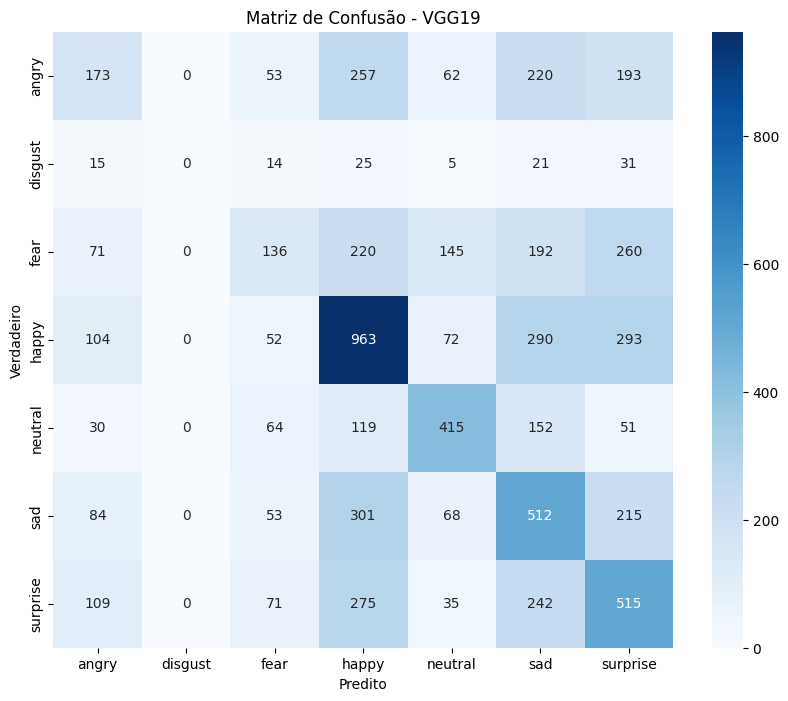

In [10]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name, "confusion_matrix_completa", LABEL_MAP, is_test=True)